### SyrialTel Customer Churn
Build a classifier to predict whether a customer will ('soon') stop doing business with SyraiTel, a telecommunications company. This is a **binary** classification problem.

Most Naturally, your audience here would be the telecom business itself, interested in reducing how much money is lost because of customers who don't stick around very long. 

Are there any predicatble patterns here?

### Step 1: Importing libraries

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

C:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### Step 2: Understanding the dataset

In [2]:
#read file from the csv as a datframe and display the first 5 rows
df = pd.read_csv('CustomerChurnData.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Data Description
`State`- 

In [3]:
#Check the number of records and features using the .shape method
print(f'The dataset has {df.shape[0]} rows')
print(f'The dataset has {df.shape[1]} columns')

The dataset has 3333 rows
The dataset has 21 columns


In [4]:
#check information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

All our columns have non-null values, there are no missing data points ensuring our dataset is ready for processing and modelling

In [5]:
#confirm that they are no missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
#check data statistics for numbers
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


- Customer that stayed for long with the company is 243 days and on average 101 days.
- on average voice mail messages are not frequent, could be no voice mail message in a day
- we can also see that more phone calls last longer in the evening and at night. We also see that that night time calling is the cheapest, followed by evening which is almost double and during the days almost four times compared to night time. Lesser international calls are made probably due to high ratings.
- Customer service calls on average are not may but maximum of 9 which could show customer disatisfaction.
- We will also need to scale th data due to the different scales used in the dataset

In [7]:
#statitiscs for strings
df.describe(include='O')

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,382-4657,no,no
freq,106,1,3010,2411


Voice mail plan lower subscription with international plan having the lowest subscriptions.
We also see that state WV has the highest number of customers

In [8]:
#value counts for categorical columns
df['state'].value_counts(normalize=True)

WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
WI    0.023402
OH    0.023402
OR    0.023402
WY    0.023102
VA    0.023102
CT    0.022202
MI    0.021902
ID    0.021902
VT    0.021902
TX    0.021602
UT    0.021602
IN    0.021302
MD    0.021002
KS    0.021002
NC    0.020402
NJ    0.020402
MT    0.020402
CO    0.019802
NV    0.019802
WA    0.019802
RI    0.019502
MA    0.019502
MS    0.019502
AZ    0.019202
FL    0.018902
MO    0.018902
NM    0.018602
ME    0.018602
ND    0.018602
NE    0.018302
OK    0.018302
DE    0.018302
SC    0.018002
SD    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
GA    0.016202
DC    0.016202
HI    0.015902
TN    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: state, dtype: float64

Almost equal distribution of customers among the states 

In [9]:
df['phone number']

0       382-4657
1       371-7191
2       358-1921
3       375-9999
4       330-6626
          ...   
3328    414-4276
3329    370-3271
3330    328-8230
3331    364-6381
3332    400-4344
Name: phone number, Length: 3333, dtype: object

phone number not important to determine whether a customer churned or not

In [10]:
df['international plan'].value_counts(normalize=True)

no     0.90309
yes    0.09691
Name: international plan, dtype: float64

90 % of the customers do not have an international plan

In [11]:
df['voice mail plan'].value_counts(normalize=True)

no     0.723372
yes    0.276628
Name: voice mail plan, dtype: float64

A huge number of customers do not have a voice mail plan 

In [12]:
#checking the boolean target variables
df.describe(include='bool')

,churn
count,3333
unique,2
top,False
freq,2850


We see that customers who didnt churn are the highest, this also shows an imbalance in the traget variable

### Step3: Data Cleaning

In [13]:
#check for duplicates
df.duplicated().sum()

0

In [14]:
#drop phone number
df.drop('phone number',axis=1,inplace=True)

In [15]:
#confirm drop
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


We see no duplicates in the dataset

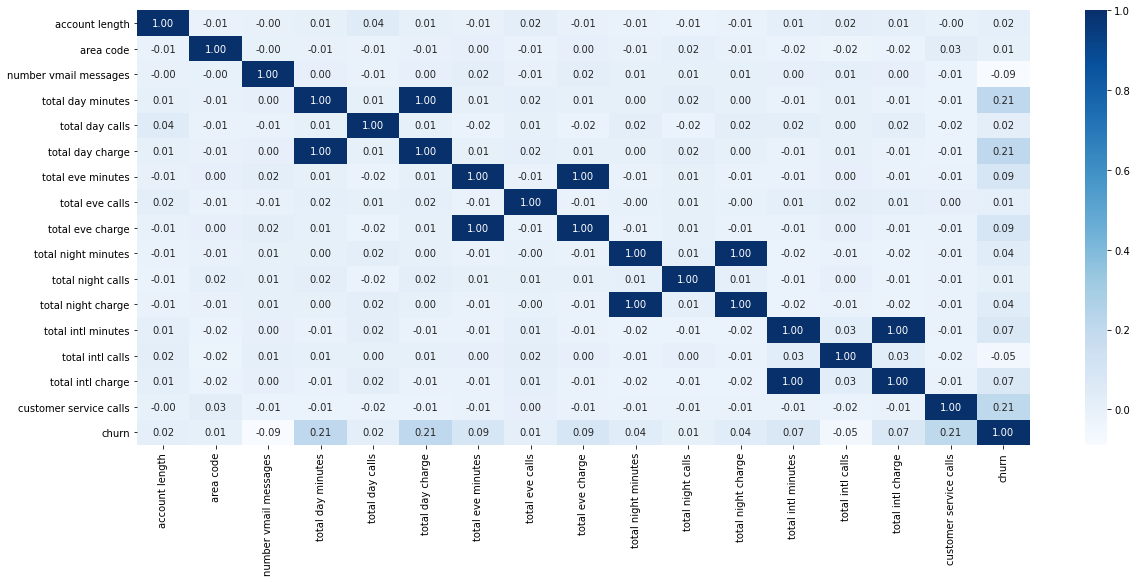

In [16]:
#remove correlated features
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Blues');

Key Insights:
Churn Has the Strongest Correlation with Customer Service Calls (+0.21)

Higher customer service calls are linked to increased churn.
This suggests that customer dissatisfaction or complaints might be a major reason for leaving.
Total Day Minutes and Total Day Charge Are Perfectly Correlated (+1.0)

This is expected, as charges are directly derived from minutes.
Total Day Minutes Show a Moderate Correlation with Churn (+0.21)

Customers who use more daytime minutes are slightly more likely to churn.
Possible reason: High usage leads to high bills, causing dissatisfaction.
Total Intl Calls and Intl Charge Have a Weak Positive Correlation with Churn (+0.05 & +0.06)

Customers making more international calls may also be at slightly higher risk of churn.
They might be switching to cheaper alternatives.
Area Code Has No Significant Correlation with Churn (≈0.03)

Geographical location does not strongly impact customer churn.
Business Implications:
✅ High Customer Service Calls Indicate Churn Risk:

Customers who call support frequently may be unhappy and likely to churn.
Action: Improve customer service experience, offer proactive resolutions.
✅ High Daytime Usage May Lead to Churn:

Customers using many day minutes might face high charges.
Action: Offer personalized retention plans or bill warnings for high users.
✅ Monitor International Callers:

They may be seeking better rates elsewhere.
Action: Offer special discounts for frequent international callers.

In [17]:
import numpy as np


# Compute the correlation matrix
corr_matrix = df.corr().abs()

# Create an upper triangle matrix to avoid duplicate checks
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation higher than a threshold (e.g., 0.9)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop correlated columns
df= df.drop(columns=to_drop)

print(f"Removed correlated features: {to_drop}")


Removed correlated features: ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']


### Step 4: EDA

In [18]:
#check numerical columns
numerical_columns = df.describe().columns
numerical_columns

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total eve minutes',
       'total eve calls', 'total night minutes', 'total night calls',
       'total intl minutes', 'total intl calls', 'customer service calls'],
      dtype='object')

In [19]:
#histogram and Kde minutes,calls and charges
#create a function to avoid repetition for evening and international minutes and charges
def plot_hist_kde(columns):
    #define 3 rows and 2 columns where eacch row represent a column and its histogram and kdeplot respectively
    fig,ax = plt.subplots(nrows=len(columns),ncols=2,figsize=(20,len(columns) *3))
    for i,col in enumerate(columns):
        sns.histplot(df[col],bins=30,ax= ax[i,0])
        ax[i,0].set(title=f'Histogram of {col}')

        sns.kdeplot(df[col],ax=ax[i,1])
        ax[i,1].set(title=f'KDE of {col}')
    #prevent overallaping of the plots
    plt.tight_layout();

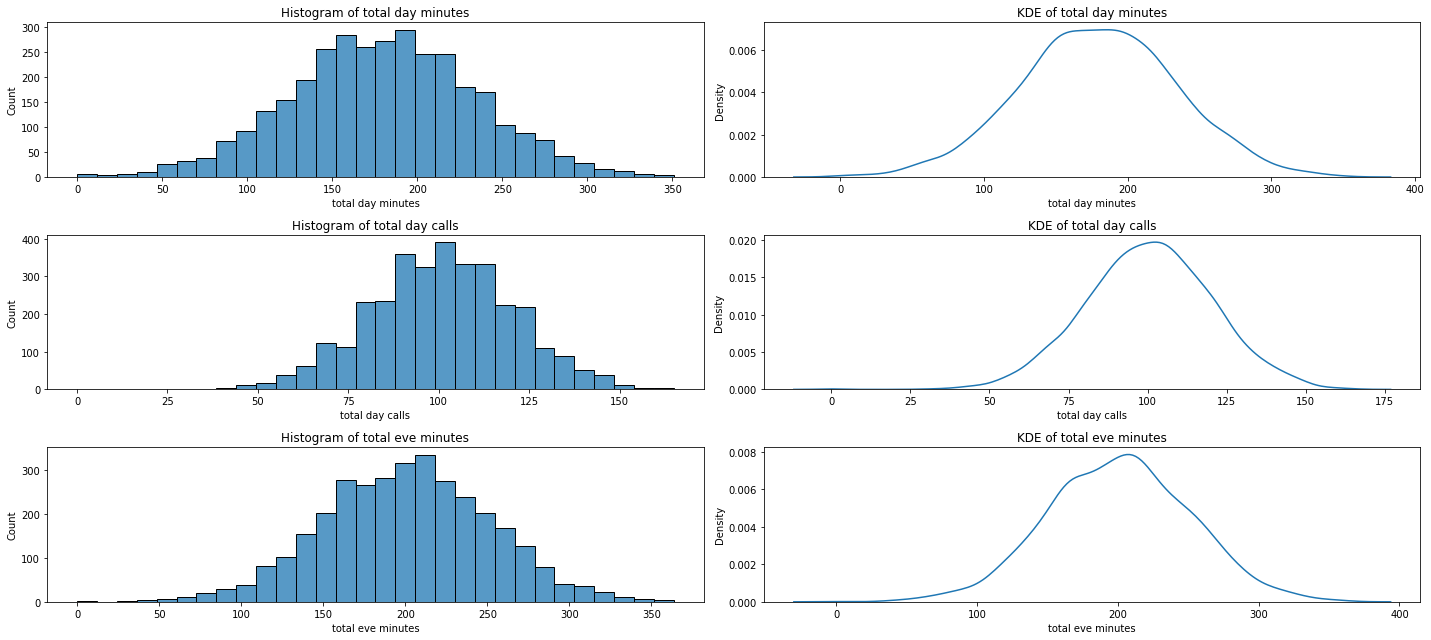

In [20]:

#Day time minutes, calls and charges visualization
columns_day =numerical_columns[3:6]

plot_hist_kde(columns_day)

The histograms show bell-shaped (normal-like) distributions, meaning most people have usage around the middle values, with fewer people having very high or very low usage.
The KDE plots confirm this, showing smooth curves that peak in the middle, representing the most common values.
Total day minutes and total day charge have similar distributions (expected since charges depend on minutes used).
Total day calls also follows a similar pattern but with a slightly different shape.

**Insights**

Most users have moderate phone usage, with fewer users at the extremes.
The distributions are fairly symmetric, suggesting no strong skewness.
KDE plots provide a smoother visualization of the data distribution compared to histograms.

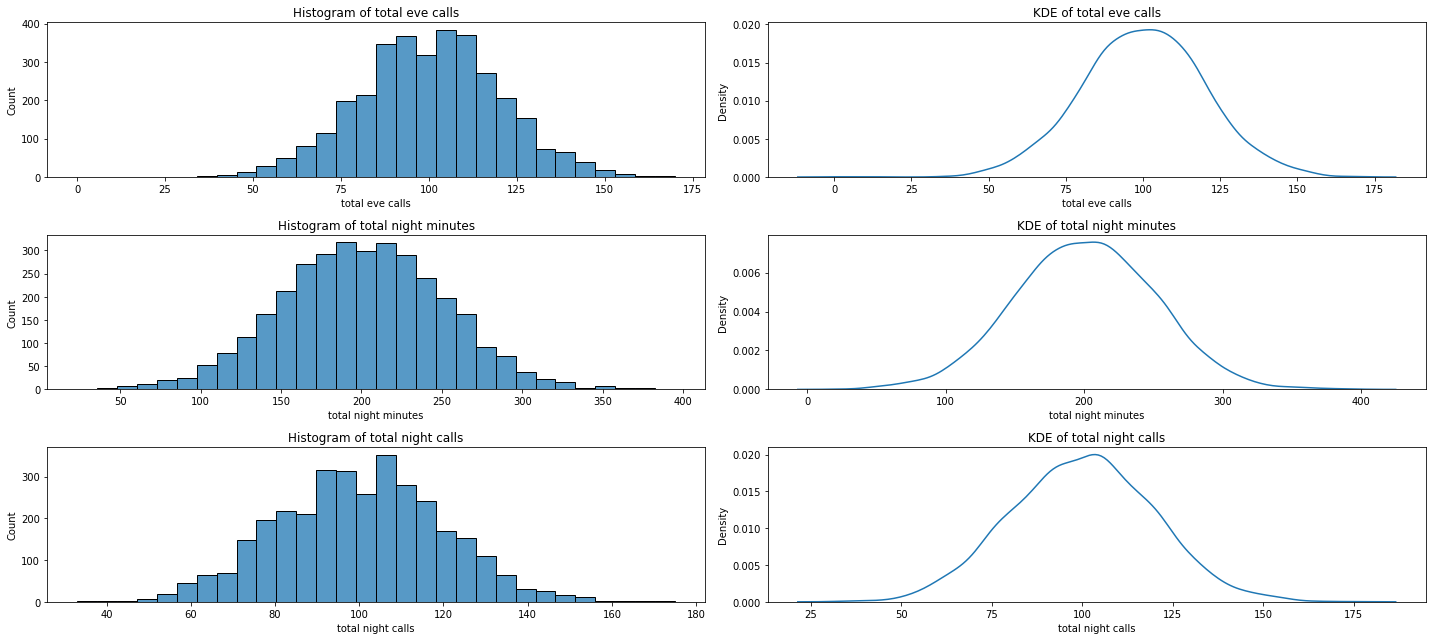

In [21]:
#Evening time minutes, calls and charges visualization
columns_evening =numerical_columns[6:9]

plot_hist_kde(columns_evening)

The distributions appear normal(bell-shaped) meaning that most users have moderate evening usage with a few  make very high or low usage

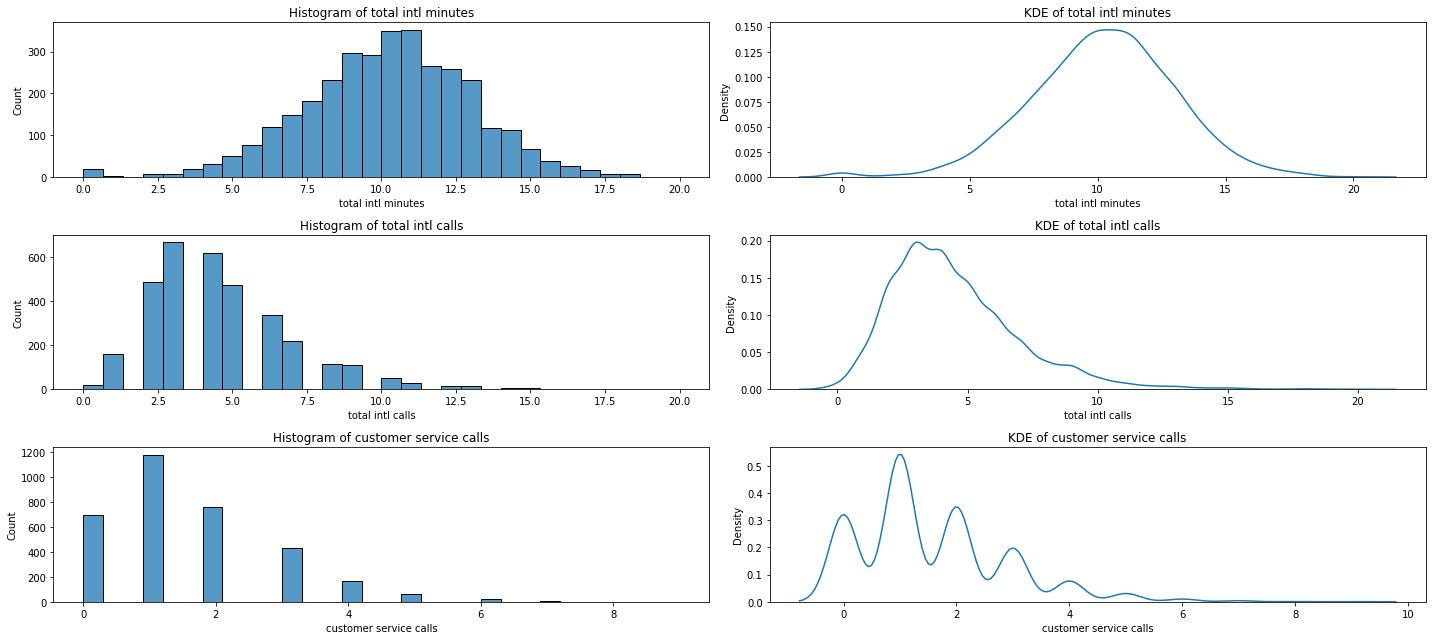

In [22]:
#Night time minutes, calls and charges visualization
columns_night =numerical_columns[9:12]

plot_hist_kde(columns_night)

The distributions appear symmetrical and normally distributed for all three metrics.
The charges follow a similar pattern to call minutes, which makes sense as charges are typically proportional to duration.

In [23]:
#International time minutes, calls and charges visualization
# columns_intl =numerical_columns[12:15]

# plot_hist_kde(columns_intl)

International minutes and charges follow a normal distribution meaning that users fall within the average usage.
Internatonal calls are right skewed suggesting that most users make few international calls but some make sinificantly more

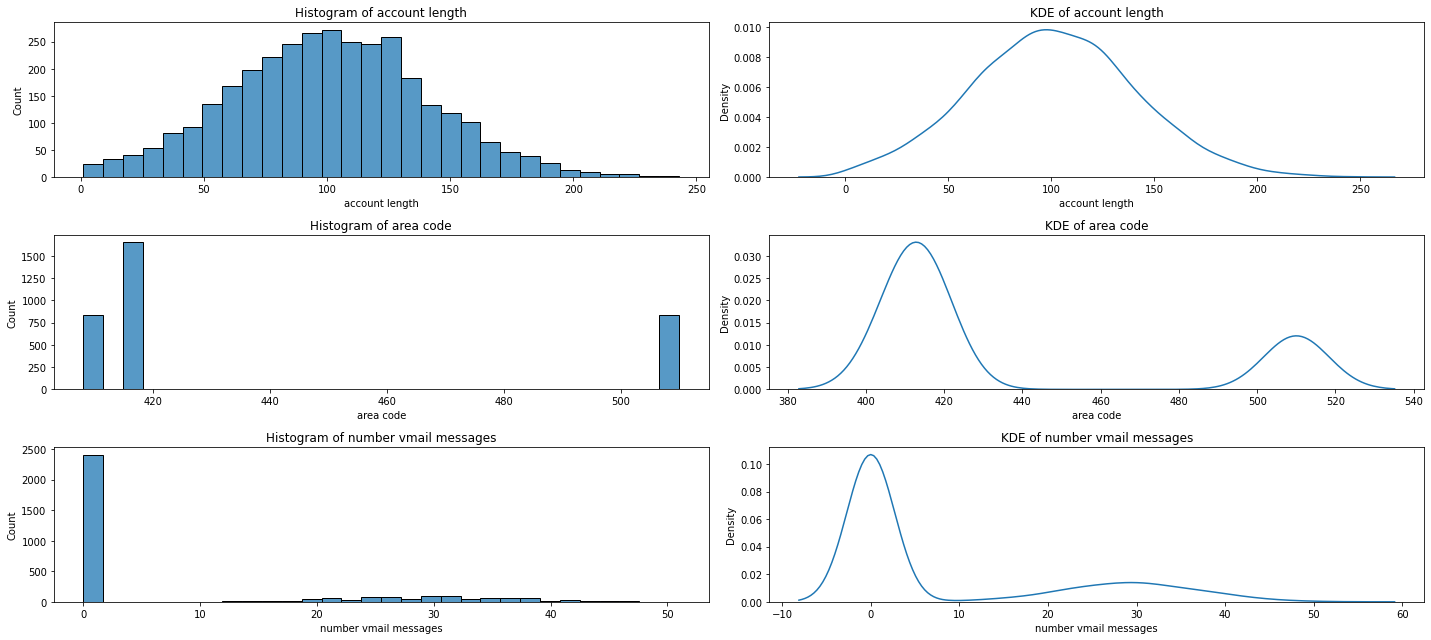

In [24]:
#Check account length, area code and voice mail messages
acc =numerical_columns[:3]

plot_hist_kde(acc)

Account length is normally distributed, with most users having accounts between 50-150 days.
Area codes are categorical, explaining the distinct peaks in their histogram.
Voicemail usage is highly skewed, showing that most users do not use voicemail at all.

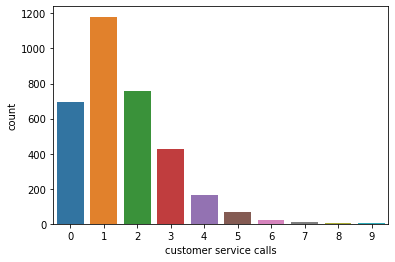

In [25]:
customer_service =numerical_columns[-1]

sns.countplot(data=df,x=customer_service);

Most customers called the customer service once(approximately 1200) customers.A significant number almost 800 customers never called at all.
Only a few customers (less than 50) called the customer care more than 6 times
The distributon is right skewed meaning that a small number of users call the customer care excessively

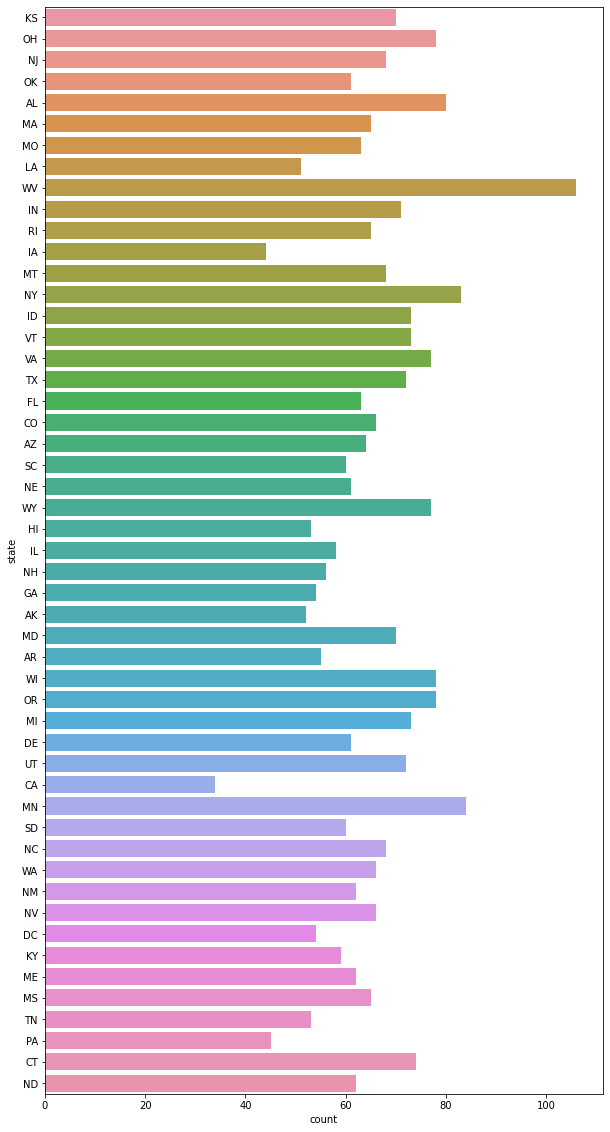

In [26]:
#Visualize categorical variables
plt.figure(figsize=(10,20))
sns.countplot(data=df,y='state');

Almost similar distribution among the states

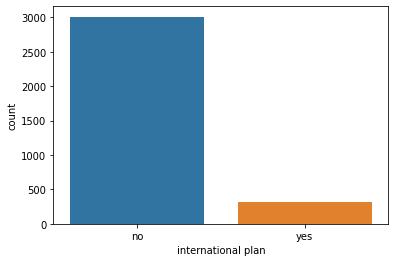

In [27]:
#	international plan
sns.countplot(data=df,x='international plan');

Many customers lack the international plan

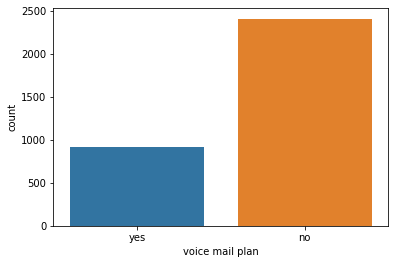

In [28]:
#	voice mail plan
sns.countplot(data=df,x='voice mail plan');

A huge percentage of customers lack the voice mail plan

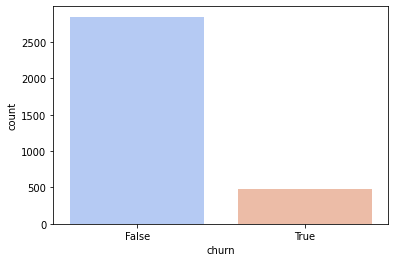

In [29]:
#check churned vs Non-churned customers
sns.countplot(data=df,x='churn',palette='coolwarm');

Great number of customers remained as customers and didnt quit

#### Bivariate Analysis

In [30]:
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,215.5,126,279.1,83,9.9,6,2,False
3329,WV,68,415,no,no,0,231.1,57,153.4,55,191.3,123,9.6,4,3,False
3330,RI,28,510,no,no,0,180.8,109,288.8,58,191.9,91,14.1,6,2,False
3331,CT,184,510,yes,no,0,213.8,105,159.6,84,139.2,137,5.0,10,2,False


In [31]:
#define function to plot barplots for customer churn
def barplot(yaxis):
    sns.barplot(data=df, y=yaxis,x='churn')
    plt.title(yaxis)

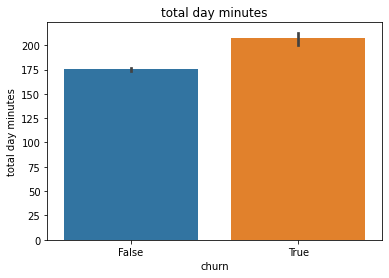

In [32]:
# sns.barplot(data=df, y='total day minutes',x='churn')
# plt.title()
barplot('total day minutes')

Number of customers who churned actually had more day minutes

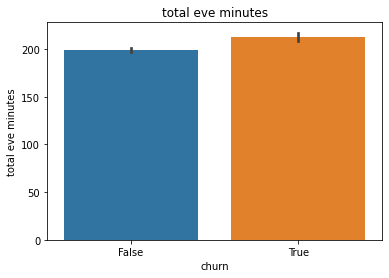

In [33]:
barplot('total eve minutes')

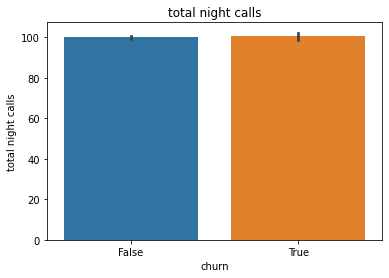

In [34]:
barplot('total night calls')

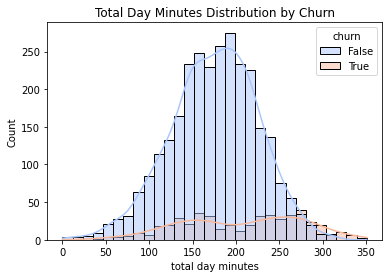

In [35]:
#Monthly Usage Patterns (Total Day Minutes vs. Churn)

sns.histplot(data=df, x='total day minutes', hue='churn', kde=True, bins=30, palette='coolwarm')
plt.title("Total Day Minutes Distribution by Churn")
plt.show()


Key Insights:
Customers with Higher Total Day Minutes Are More Likely to Churn.

The blue area (non-churned customers) follows a normal distribution, peaking around 150–250 minutes.
The peach area (churned customers) is more spread out, showing that higher total day minutes are associated with churn.
Many churned customers have above 200+ total day minutes.
Low Usage Customers Rarely Churn.

Customers with below ~100 total day minutes rarely churn (almost no peach-colored bars in this range).
Business Implications:
✅ Heavy Callers Are at Higher Risk of Churning:

Customers using a high number of minutes may receive expensive bills, leading to dissatisfaction.
They might switch to competitors with better pricing.
✅ Retention Strategy for High-Usage Customers:

Offer discounted plans or loyalty benefits for heavy users.
Analyze billing complaints to see if cost concerns drive churn.
✅ Monitor Usage Trends for Proactive Intervention:

If a customer’s usage suddenly increases, they might be at risk of churn.
Provide personalized offers or conduct a satisfaction survey to retain them.


In [36]:

# sns.histplot(data=df, x='total day charge', hue='churn', kde=True, bins=30, palette='coolwarm')
# plt.title("Total Day Charges Distribution by Churn")
# plt.show()


Key Insights:
Higher Total Day Charges Are Associated with Churn.

The majority of non-churned customers (False - blue) fall within the $20–$40 range.
The churned customers (True - peach) are more spread out, but many churned users have charges above $40.
Low Charges Customers Rarely Churn.

Customers with total day charges below ~$20 rarely churn.
This suggests that low-usage, low-cost customers are generally satisfied.
Business Implications:
✅ High Charges May Cause Churn:

Customers with high total day charges ($40+) churn more often.
This could indicate billing dissatisfaction, possibly due to high costs or unexpected fees.
✅ Retention Strategy for High-Charge Customers:

Offer discounts, loyalty rewards, or special pricing plans to customers with high charges.
Provide clearer billing breakdowns to avoid dissatisfaction.
✅ Monitor Billing Complaints:

Track if high-charge customers are contacting customer service about billing issues.
Consider alerting customers about high usage before billing cycles end.


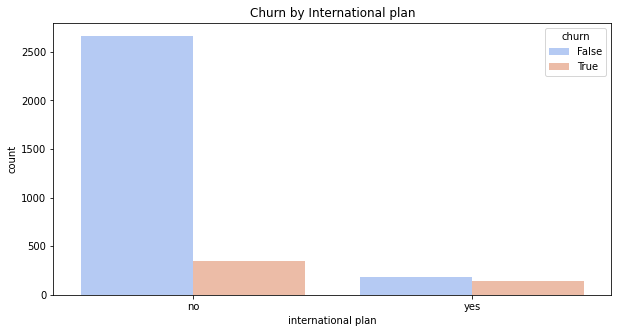

In [37]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='international plan', hue='churn', palette='coolwarm')
plt.title("Churn by International plan");

Most Customers did not have an international plan and most of them did not churn
Those with international plan have the same rate of churn,meaning a higher churn rate in this group

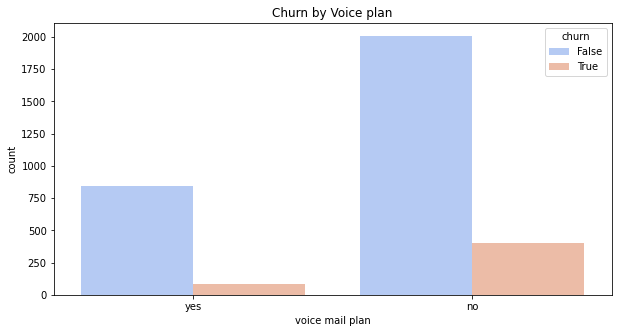

In [38]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='voice mail plan', hue='churn', palette='coolwarm')
plt.title("Churn by Voice plan");

Many customers have no voice plan and many ofthem did not churn
Also those with voice mail plan most of them did not churn

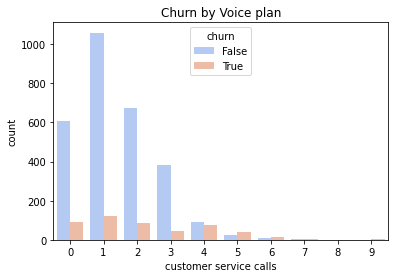

In [39]:
sns.countplot(data=df, x='customer service calls', hue='churn', palette='coolwarm')
plt.title("Churn by Voice plan");

majority of customers have made 0,1 or 2 calls to customer service.
Most of these customers did not churn. as the number of calls increased the proportion of churned customers increased

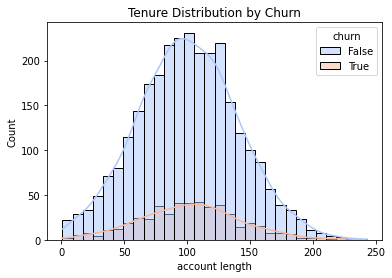

In [40]:
sns.histplot(data=df, x='account length', hue='churn', kde=True, bins=30, palette='coolwarm')
plt.title("Tenure Distribution by Churn")
plt.show()

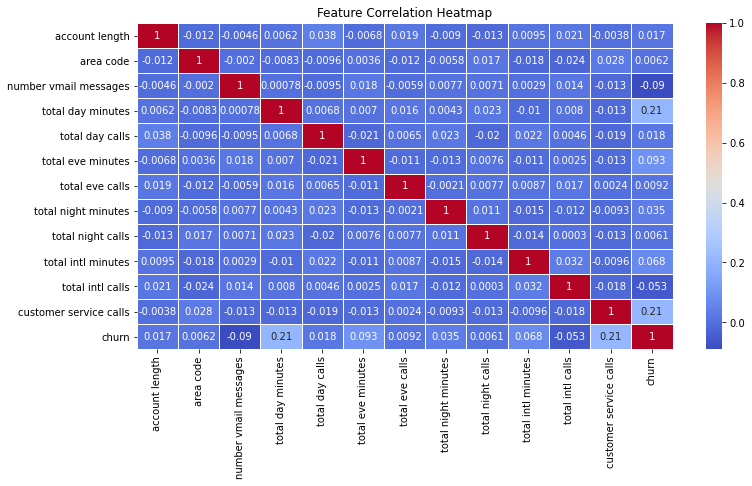

In [41]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Key Insights:
Churn Has the Strongest Correlation with Customer Service Calls (+0.21)

Higher customer service calls are linked to increased churn.
This suggests that customer dissatisfaction or complaints might be a major reason for leaving.
Total Day Minutes and Total Day Charge Are Perfectly Correlated (+1.0)

This is expected, as charges are directly derived from minutes.
Total Day Minutes Show a Moderate Correlation with Churn (+0.21)

Customers who use more daytime minutes are slightly more likely to churn.
Possible reason: High usage leads to high bills, causing dissatisfaction.
Total Intl Calls and Intl Charge Have a Weak Positive Correlation with Churn (+0.05 & +0.06)

Customers making more international calls may also be at slightly higher risk of churn.
They might be switching to cheaper alternatives.
Area Code Has No Significant Correlation with Churn (≈0.03)

Geographical location does not strongly impact customer churn.
Business Implications:
✅ High Customer Service Calls Indicate Churn Risk:

Customers who call support frequently may be unhappy and likely to churn.
Action: Improve customer service experience, offer proactive resolutions.
✅ High Daytime Usage May Lead to Churn:

Customers using many day minutes might face high charges.
Action: Offer personalized retention plans or bill warnings for high users.
✅ Monitor International Callers:

They may be seeking better rates elsewhere.
Action: Offer special discounts for frequent international callers.

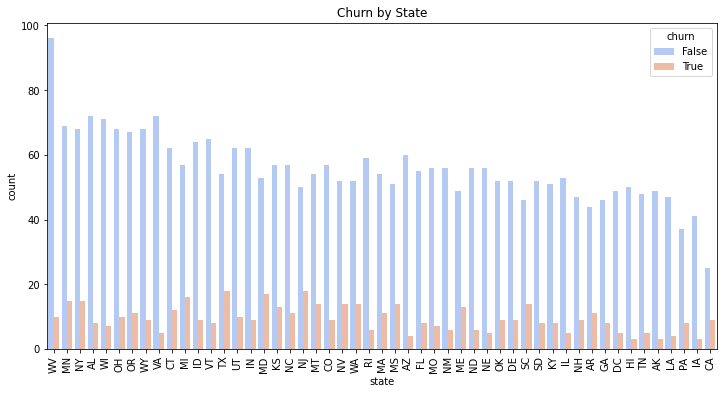

In [42]:
#churn  by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='state', hue='churn', palette='coolwarm', order=df['state'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Churn by State")
plt.show()


Churn is Spread Across All States

No state has zero churn, meaning churn is a universal issue across locations.
Some States Have Higher Churn Rates

While most states have a similar churn proportion, some states show slightly higher churn than others.
The highest churn counts appear in states like WV, NY, TX, and CA.
State Does Not Seem to Be a Major Predictor of Churn

The relative proportion of churn to non-churn remains fairly consistent across all states.
This suggests that state-based factors (like location or area code) may not strongly impact churn.
Business Implications:
✅ State-Based Marketing Might Not Be the Best Churn Prevention Strategy

Since churn is evenly distributed, a state-specific approach may not be effective.
Instead, focus on individual customer behavior and service-related issues.
✅ Investigate High-Churn States for Local Issues

Are there network issues, pricing complaints, or local competitors in high-churn states?
Conduct customer surveys or feedback analysis in those areas.
✅ Confirm with Further Analysis

Calculate the churn rate per state instead of raw counts

### Step 5: Modelling

In [43]:
X = df.drop(columns='churn')
y = df['churn']

#split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,stratify=y)

In [44]:
#Define Categorical and numerical features
categorical_features = X.select_dtypes(include='O').columns
numerical_features = X.select_dtypes(include=['int','float']).columns

transformer = ColumnTransformer([
    ('ohe',OneHotEncoder(handle_unknown='ignore'),categorical_features),
    ('scaler',StandardScaler(),numerical_features)
])

In [45]:
pipe = ImbPipeline([
    ('preprocessor',transformer),
    ('smote',SMOTE(sampling_strategy='auto',random_state=42)),
    ('model',LogisticRegression(solver='liblinear'))
])


pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

       False       0.93      0.82      0.87       570
        True       0.37      0.62      0.46        97

    accuracy                           0.79       667
   macro avg       0.65      0.72      0.67       667
weighted avg       0.85      0.79      0.81       667



Defined the target features and had the remaining items as our features variables and did a train_test_split to gave training and test data.

We used column transformers so as to do processing needed per columns i.e one hot encoding categorcal variables since we cant model objects and scaled numeric columns since they are in different scales

Use ImbPipeline to do the transformation and modelling at the same place,had to used ImbPipeine since it allows handling of imabalanced data with resampling techniques like smote

In [46]:
#function to fit, predict and evaluate
def modelling(pipe):
    pipe.fit(X_train, y_train)

    # Predict train and test data
    y_hat_train = pipe.predict(X_train)
    y_hat_test = pipe.predict(X_test)
    
    # Get accuracy, precision, recall, and F1-score
    train_accuracy = accuracy_score(y_train, y_hat_train)
    test_accuracy = accuracy_score(y_test, y_hat_test)
    train_precision = precision_score(y_train, y_hat_train, average='weighted')
    test_precision = precision_score(y_test, y_hat_test, average='weighted')
    train_recall = recall_score(y_train, y_hat_train, average='weighted')
    test_recall = recall_score(y_test, y_hat_test, average='weighted')
    train_f1 = f1_score(y_train, y_hat_train, average='weighted')
    test_f1 = f1_score(y_test, y_hat_test, average='weighted')
    
    # Get prediction probabilities for AUC score
    y_pred_proba = pipe.predict_proba(X_test)[:, 1]
    test_roc_auc = roc_auc_score(y_test, y_pred_proba) 
    
     # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {test_roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid();
    
    return {
        'Training Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
#         'Training precision': base_train_precision,
        'Test precision': test_precision,
#         'Training recall': base_train_recall,
        'Test recall': test_recall,
#         'Training f1_score': base_train_f1,
        'Test f1_score': test_f1,
        'Test AUC': test_roc_auc
    }

{'Training Accuracy': 0.7854463615903976,
 'Test Accuracy': 0.7916041979010495,
 'Test precision': 0.8458224133257906,
 'Test recall': 0.7916041979010495,
 'Test f1_score': 0.811453912084992,
 'Test AUC': 0.7947187556520166}

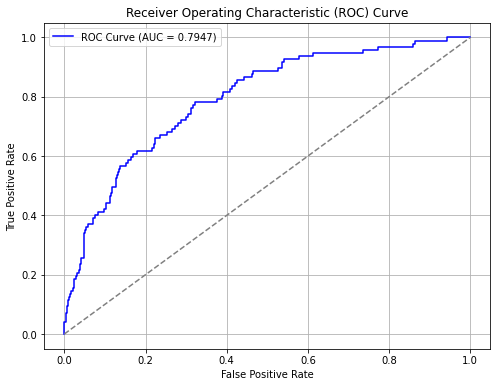

In [47]:


# Identify categorical and numerical features
categorical_features = ['state', 'international plan', 'voice mail plan']
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [col for col in numerical_features if col not in categorical_features]  # Exclude categorical

# Step 1: Define Preprocessing Pipeline (OneHotEncoding + Scaling)
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
    ('scaler', StandardScaler(), numerical_features)
])

# Step 2: Define Full Pipeline (Preprocessing + SMOTE + Model)
pipe = ImbPipeline([
    ('preprocessor', preprocessor),  # First, apply encoding & scaling
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),  # Handle class imbalance
    ('model', LogisticRegression(solver='liblinear'))  # Train model
])

#Train the Pipeline on Training Data
# Predict on Test Data
# Evaluate Model
logreg = modelling(pipe)
logreg

Works well for structured data and binary classification.
Provides probabilities for churn likelihood.
Easily interpretable via coefficients.

{'Training Accuracy': 0.9632408102025506,
 'Test Accuracy': 0.8875562218890555,
 'Test precision': 0.8870781607882574,
 'Test recall': 0.8875562218890555,
 'Test f1_score': 0.8873141909879525,
 'Test AUC': 0.8806746247060951}

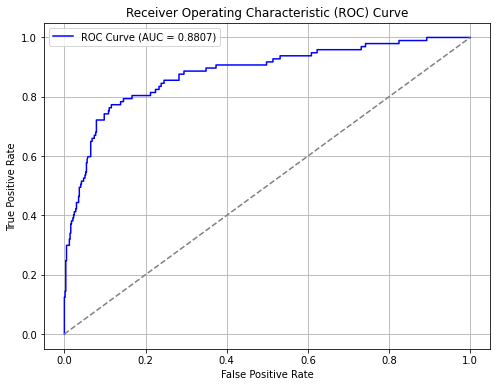

In [48]:
#svm
pipe.set_params(model=svm.SVC(probability=True))
svm = modelling(pipe)
svm

Which Model Should You Choose?
Criteria	Best Model
Small dataset (<10K rows)	Logistic Regression, SVM
Medium dataset (10K - 1M rows)	Random Forest, XGBoost
Large dataset (>1M rows)	LightGBM, CatBoost, Neural Networks
Explainability needed	Logistic Regression, Decision Trees
Best accuracy required	XGBoost, LightGBM, Neural Networks

{'Training Accuracy': 1.0,
 'Test Accuracy': 0.8980509745127436,
 'Test precision': 0.9069193664037546,
 'Test recall': 0.8980509745127436,
 'Test f1_score': 0.9015612262479396,
 'Test AUC': 0.8334147223729427}

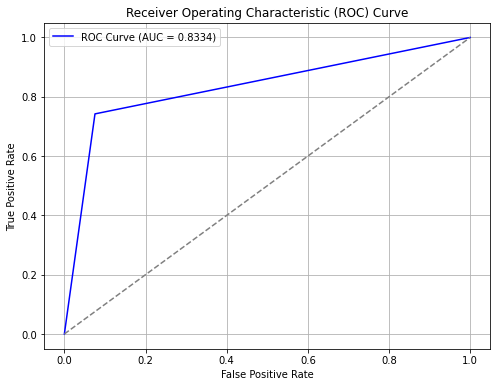

In [49]:
from sklearn.tree import DecisionTreeClassifier
pipe.set_params(model=DecisionTreeClassifier())
dt = modelling(pipe)
dt

Handles non-linearity better than logistic regression.
Easy to visualize for insights.

{'Training Accuracy': 1.0,
 'Test Accuracy': 0.9190404797601199,
 'Test precision': 0.9143008288943797,
 'Test recall': 0.9190404797601199,
 'Test f1_score': 0.9150855606679419,
 'Test AUC': 0.9178694158075601}

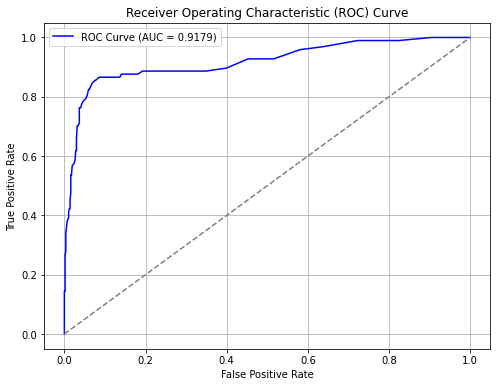

In [50]:
from sklearn.ensemble import RandomForestClassifier
pipe.set_params(model=RandomForestClassifier())
rf =modelling(pipe)
rf

Reduces overfitting by averaging multiple trees.
Handles missing values & categorical data well.

In [51]:
#create a dataframe for all items
# Dictionary of model results
model_results = {
    "Logistic Regression": logreg,
    "Random Forest": rf,
    "Decision Tree": dt,
    "SVM": svm,
}

# Convert dictionary to DataFrame
df_results = pd.DataFrame.from_dict(model_results, orient='index')

# Display the DataFrame
df_results

,Training Accuracy,Test Accuracy,Test precision,Test recall,Test f1_score,Test AUC
Logistic Regression,0.785446,0.791604,0.845822,0.791604,0.811454,0.794719
Random Forest,1.000000,0.919040,0.914301,0.919040,0.915086,0.917869
Decision Tree,1.000000,0.898051,0.906919,0.898051,0.901561,0.833415
SVM,0.963241,0.887556,0.887078,0.887556,0.887314,0.880675


In [52]:
df_results['Training Accuracy'] - df_results['Test Accuracy']

Logistic Regression   -0.006158
Random Forest          0.080960
Decision Tree          0.101949
SVM                    0.075685
dtype: float64

Random forest is the bets performing model.Despite overfitting(Training accuracy of 100%) it performs well on test data
Also has a small difference between train and test accuracy

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Define the model
model = pipe.set_params(model = RandomForestClassifier())
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')

# Print Results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-Validation Scores: [0.95131086 0.93058161 0.92307692 0.93058161 0.94371482]
Mean Accuracy: 0.9359
Standard Deviation: 0.0102


No much diference between split and cross validation,train_test_plit performs little better on adding shuffle and statify

In [54]:
#feature importance
# Get feature importances
from sklearn.inspection import permutation_importance
model = pipe.set_params(model = RandomForestClassifier())
model.fit(X_train,y_train)
perm_importance = permutation_importance(model, X_train, y_train, scoring='accuracy')

# Convert to pandas series
perm_importance_df = pd.Series(perm_importance.importances_mean, index=X.columns)
print(perm_importance_df.sort_values(ascending=False))

total day minutes         0.089722
international plan        0.059115
customer service calls    0.054464
voice mail plan           0.034134
total eve minutes         0.029857
total intl calls          0.024531
state                     0.017779
total intl minutes        0.017029
total night minutes       0.008702
area code                 0.006152
total day calls           0.003301
number vmail messages     0.002776
total night calls         0.002701
total eve calls           0.002476
account length            0.002326
dtype: float64


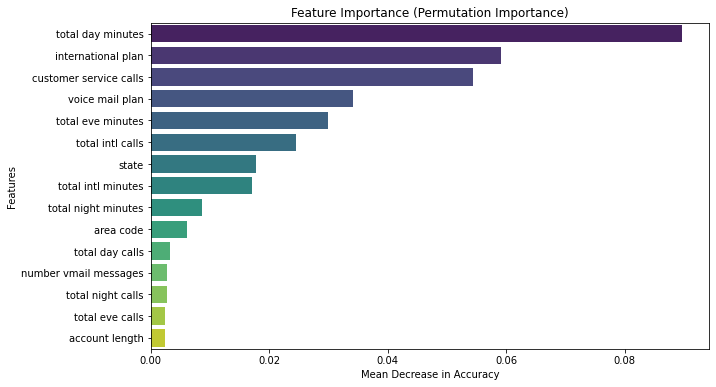

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort feature importance values
sorted_importance = perm_importance_df.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance, y=sorted_importance.index, palette="viridis")

# Labels and title
plt.xlabel("Mean Decrease in Accuracy")
plt.ylabel("Features")
plt.title("Feature Importance (Permutation Importance)")
plt.show()


used  permutation importance instead of gini importance as permuation is more reliable and evaluates actail impact on the model while fini can be biases towards high-cardinality features

In [56]:
#Hyper parameter tuninga